# 602 Midterm Project

- Naveen Donthula
- Durga Venkata Phanindra Kumar Mulamreddy

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/dataset_newsletter.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS
...,...,...,...,...,...,...
19602,19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,1/11/23 10:28 AM,ANNOUNCEMENTS
19603,19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,1/13/23 9:43 AM,ANNOUNCEMENTS
19604,19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,1/13/23 9:49 AM,CLUBS
19605,19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,1/15/23 8:29 PM,CLUBS


In [18]:
df['category'].nunique()

12

In [19]:
Each_Category = df['category'].value_counts()
print(Each_Category)

ANNOUNCEMENTS        10240
BREAKING NEWS         3649
UPCOMING EVENTS       3055
PTO                   1507
IMPORTANT NEWS         452
CLUBS                  363
ATHLETICS              170
DONATIONS NEEDED        63
FIELD TRIPS             53
VOLUNTEERS NEEDED       27
ACHIEVEMENTS            25
STUDENT THOUGHTS         3
Name: category, dtype: int64


This is an Unbalanced DATA SET.

In [20]:
df.isna().sum()

Unnamed: 0          0
title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

The signature, tiltle and body has null values

In [21]:
df['body'] = df['body'].fillna('')
body_count = df['body'].str.split().apply(len)
print(df[body_count == 1])

       Unnamed: 0                                              title  \
895           895      Earth Day is coming up and we have T Shirts.    
896           896      Earth Day is coming up and we have T Shirts.    
972           972  Enjoy your time off. We will see you April 5, ...   
973           973  Enjoy your time off. We will see you April 5, ...   
1330         1330                                       JUST FOR YOU   
...           ...                                                ...   
19550       19550                                  Parent University   
19551       19551                                     Lost and Found   
19552       19552                                     Be a Volunteer   
19553       19553                                       Join the PTO   
19592       19592        Progress Reports are available in SchoolMax   

                                                    body  \
895                                                    .   
896            

In [22]:
df

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS
...,...,...,...,...,...,...
19602,19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,1/11/23 10:28 AM,ANNOUNCEMENTS
19603,19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,1/13/23 9:43 AM,ANNOUNCEMENTS
19604,19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,1/13/23 9:49 AM,CLUBS
19605,19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,1/15/23 8:29 PM,CLUBS


In [23]:
df['body'] = df['body'].str.lower()
df['body'] = df['body'].str.strip()
df['title'] = df['title'].str.lower()
df['title'] = df['title'].str.strip()
df['signature'] = df['signature'].str.lower()
df['signature'] = df['signature'].str.strip()

There are almost 162 rows in the body column has only single values, So we need to clean all the insignificant data.

In [24]:
df = df[df['body'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0) > 1]

In [25]:
df

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,mrs. laurence class,"because of the upcoming holiday, we will be re...",jaslynn laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,mr. valle's winter break packets (cornell/hamp...,"all my cornell, hampton, and princeton student...",mr. sam valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,hours of operation,"parents/guardians, we will gladly assist yo...",ms. ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,character education,cmit south scholars will continue to work on v...,ch.ed. team room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,cmit students connecting with students around ...,a couple of classes have had the opportunity t...,srta. dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS
...,...,...,...,...,...,...
19602,19602,ms. coholic's science classes,"hello all! this week, biogeochem students wil...",suzanne coholic high school science teacher s...,1/11/23 10:28 AM,ANNOUNCEMENTS
19603,19603,ap exams,clock is ticking and we have four months until...,nabil siddiqui,1/13/23 9:43 AM,ANNOUNCEMENTS
19604,19604,ever thought of becoming a software engineer?,this after school club can benefit all the com...,nabil siddiqui,1/13/23 9:49 AM,CLUBS
19605,19605,last call! women's lacrosse interest,last call! the women's lacrosse program is hav...,serey sok cmit women's lacrosse & women's socc...,1/15/23 8:29 PM,CLUBS


# Logistic Regression

In [26]:
df = df.fillna('')

# Split data into Train and test set
train_df = df.sample(frac=0.7, random_state=42)
test_df = df.drop(train_df.index)


# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['body'] +  train_df['signature'] + train_df['title'])
X_test = vectorizer.transform(test_df['body'] + test_df['signature']+ test_df['title'])


# Target variable
y_train = train_df['category']
y_test = test_df['category']

# Compute class weights based on inverse frequency in training data
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y = y_train)
class_weights_dict = {cls: w for cls, w in zip(np.unique(y_train), class_weights)}

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model on the scaled data
model = LogisticRegression(class_weight=class_weights_dict, max_iter=1000)
model.fit(X_train_scaled, y_train)


'''# Logistic regression model with class weights
model = LogisticRegression(class_weight=class_weights_dict)
model.fit(X_train, y_train)

#Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)'''


'# Logistic regression model with class weights\nmodel = LogisticRegression(class_weight=class_weights_dict)\nmodel.fit(X_train, y_train)\n\n#Train a logistic regression model\nmodel = LogisticRegression()\nmodel.fit(X_train, y_train)'

In logistic regression, the algorithm tries to minimize the error between the predicted and actual values by adjusting the coefficients of the features. However, if the dataset is imbalanced, meaning some classes have significantly fewer samples than others, the model can become biased towards the majority class, resulting in poor predictions for the minority class.

By adding weights to the minority classes, we can compensate for the class imbalance and help the algorithm to focus more on predicting the minority class correctly. Essentially, this approach gives more importance to the samples from the minority class during the training process, and thus the model can learn to classify the minority class better.

# Training accuracy

Accuracy: 0.9206290879694276
Precision: 0.8571495642839754
Classification Report
                   precision    recall  f1-score   support

     ACHIEVEMENTS       1.00      1.00      1.00        10
    ANNOUNCEMENTS       0.99      0.89      0.94      7129
        ATHLETICS       0.89      1.00      0.94       119
    BREAKING NEWS       0.92      0.94      0.93      2541
            CLUBS       0.99      1.00      1.00       252
 DONATIONS NEEDED       0.93      1.00      0.96        41
      FIELD TRIPS       0.68      1.00      0.81        39
   IMPORTANT NEWS       0.62      1.00      0.76       277
              PTO       0.85      0.98      0.91      1022
 STUDENT THOUGHTS       0.75      1.00      0.86         3
  UPCOMING EVENTS       0.83      0.94      0.88      2155
VOLUNTEERS NEEDED       0.83      1.00      0.90        19

         accuracy                           0.92     13607
        macro avg       0.86      0.98      0.91     13607
     weighted avg       0.93    

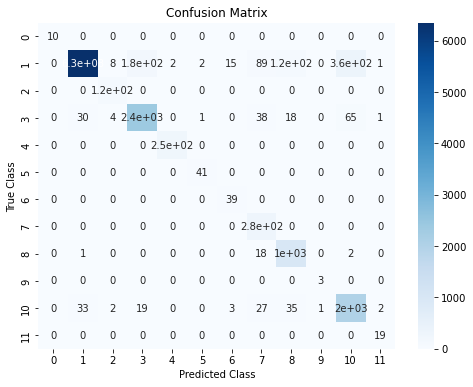

In [27]:
y_predicted =  model.predict(X_train_scaled)

print("Accuracy:", accuracy_score(y_train, y_predicted))
print("Precision:", precision_score(y_train, y_predicted, average='macro'))

print("Classification Report")
print(classification_report(y_train, y_predicted))
print("Confusion Matrix:")
confusion_Matrix = confusion_matrix(y_train, y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_Matrix, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Model Evaluation

In [12]:
score = model.score(X_test_scaled, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.7418967587034814


Accuracy: 0.7418967587034814
Classification Report
                   precision    recall  f1-score   support

     ACHIEVEMENTS       0.25      0.10      0.14        10
    ANNOUNCEMENTS       0.86      0.78      0.82      3068
        ATHLETICS       0.66      0.76      0.71        51
    BREAKING NEWS       0.66      0.68      0.67      1070
            CLUBS       0.73      0.71      0.72       111
 DONATIONS NEEDED       0.73      0.73      0.73        22
      FIELD TRIPS       0.35      0.50      0.41        14
   IMPORTANT NEWS       0.41      0.57      0.48       138
              PTO       0.72      0.81      0.76       452
 STUDENT THOUGHTS       0.00      0.00      0.00         0
  UPCOMING EVENTS       0.59      0.68      0.64       887
VOLUNTEERS NEEDED       0.25      0.25      0.25         8

         accuracy                           0.74      5831
        macro avg       0.52      0.55      0.53      5831
     weighted avg       0.75      0.74      0.75      5831

Co

C:\Users\navee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


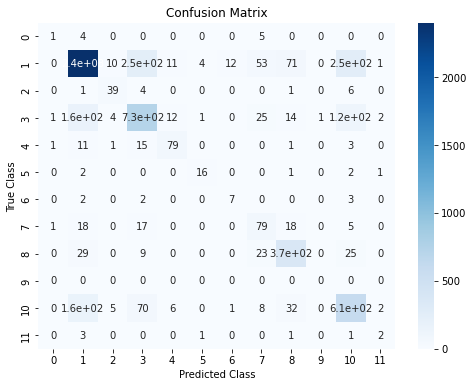

In [13]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
confusion_Matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_Matrix, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Prediction

In [14]:
new_data = ["The company's annual general meeting will be held on May 15th at 10:00 AM.", "Ten months after george floyd's death, minneapolis residents are at war over policing"]
new_data_vectorized = vectorizer.transform(new_data)
new_data_pred = model.predict(new_data_vectorized)
print("Predicted categories for new data: ", new_data_pred)

Predicted categories for new data:  ['UPCOMING EVENTS' 'BREAKING NEWS']


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Create an instance of the logistic regression model
model = LogisticRegression(class_weight=class_weights_dict, solver='saga', max_iter=10000)

# Create an instance of the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


C:\Users\navee\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['body'] + train_df['signature'] + train_df['title'])
X_test = vectorizer.transform(test_df['body'] + test_df['signature'] + test_df['title'])

# Define the target variable
y_train = train_df['category']
y_test = test_df['category']

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {score}")
print(f"Classification Report:\n{report}")


Accuracy: 0.6929012345679012
Classification Report:
                   precision    recall  f1-score   support

     ACHIEVEMENTS       1.00      0.11      0.20         9
    ANNOUNCEMENTS       0.66      0.95      0.78      2059
        ATHLETICS       0.87      0.43      0.58        30
    BREAKING NEWS       0.86      0.32      0.47       712
            CLUBS       0.90      0.35      0.50        74
 DONATIONS NEEDED       1.00      0.60      0.75        15
      FIELD TRIPS       0.40      0.29      0.33         7
   IMPORTANT NEWS       0.37      0.15      0.21        88
              PTO       0.83      0.58      0.68       314
  UPCOMING EVENTS       0.76      0.45      0.57       575
VOLUNTEERS NEEDED       0.00      0.00      0.00         5

         accuracy                           0.69      3888
        macro avg       0.70      0.38      0.46      3888
     weighted avg       0.73      0.69      0.66      3888



# SVC

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['body'] + df['signature']+ df['title'])

# Define the target variable
y = df['category']

# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a SVM model
model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
new_data = ["Attention all employees: The company picnic will take place on Saturday, June 12th from 12:00pm to 4:00pm at Central Park. Please RSVP by Monday, June 7th so we can have an accurate headcount for food and drinks. We hope to see you there!.", "This is a new article about sports.","Politics is the process of making decisions that apply to members of a group. It involves the distribution of power and resources within a society, as well as the exercise of authority and the resolution of conflicts.","Physical activities offer health benefits, create community, and drive economic growth. Despite controversy around issues like doping, they remain an enduring part of human culture, offering a unique way to connect and achieve our potential.","This after school club can benefit all the computer science focused students as they will learn the basics of Python programming language and will get the chance to do hands-on practice on exercises.   Students would be able to work on a project towards the end of the course and will be confident while solving complex object-oriented programs.   Once again, the python club meets Monday, Tuesday, every other Wednesday, and Thursday from 3:00 pm to 5:00 pm."]
new_data_vectorized = vectorizer.transform(new_data)
new_data_pred = model.predict(new_data_vectorized)
print("Predicted categories for new data: ", new_data_pred)

Accuracy: 0.6190843621399177
Predicted categories for new data:  ['UPCOMING EVENTS' 'ANNOUNCEMENTS' 'ANNOUNCEMENTS' 'ANNOUNCEMENTS'
 'ANNOUNCEMENTS']


# Conclusion

From the results we can conclude that, logistic regression is better that random forest as it takes more time to compute and the difference is not that much.